In [5]:
#looking to fit a lin reg. on life expectancy with pred. year
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


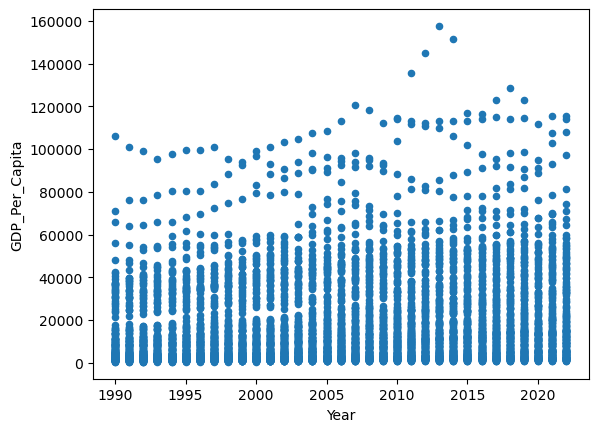

In [7]:
gdp_le.plot(kind='scatter', x='Year', y='GDP_Per_Capita');

In [9]:
lr_gdp_year = smf.ols('GDP_Per_Capita ~ Year', data=gdp_le).fit()
lr_gdp_year.params

Intercept   -581586.799562
Year            298.837456
dtype: float64

The intercept tells me that GDP Per Year data starts quote some time after 0 AD since -58000 GDP Per Capita doesn't make sense. Additionally, GDP Per Capita increases on average by $298.84 per year! Cool. I wonder if this is related to inflation...

In [11]:
pred_gdp_by_year_df = pd.DataFrame(
    {
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)

pred_gdp_by_year_df['mean estimate'] = lr_gdp_year.predict(pred_gdp_by_year_df)

pred_gdp_by_year_df.head()

,Year,mean estimate
0,1990.000000,13099.738505
1,1990.653061,13294.897660
2,1991.306122,13490.056815
3,1991.959184,13685.215971
4,1992.612245,13880.375126


In [16]:
year = 2000
estimate = lr_gdp_year.params['Intercept'] + lr_gdp_year.params['Year']*year
estimate

16088.113068240229

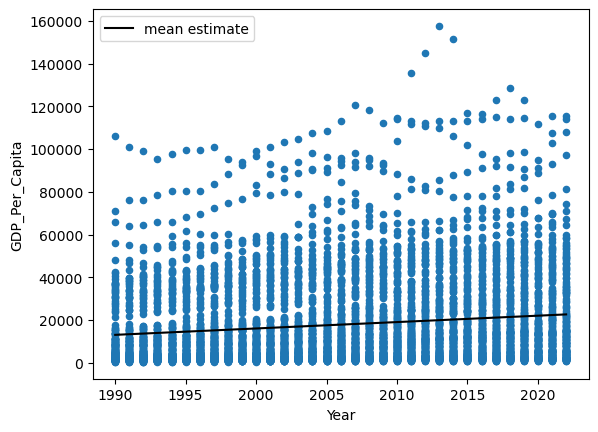

In [21]:
fig, ax = plt.subplots()
gdp_le.plot(kind='scatter', x='Year', y='GDP_Per_Capita', ax=ax)
pred_gdp_by_year_df.plot(kind='line', x='Year', y='mean estimate', color='black', ax=ax);

In [22]:
#trying looking at years since 1990 as a predictor variable
lr_gdp_year = smf.ols('GDP_Per_Capita ~ I(Year - 1990)', data=gdp_le).fit()
lr_gdp_year.params

Intercept         13099.738505
I(Year - 1990)      298.837456
dtype: float64

This intercept makes more sense... the average GDP Per Capita in 1990 is 13000.74

In [23]:
lr_gdp_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP_Per_Capita   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     106.1
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.18e-24
Time:                        21:09:19   Log-Likelihood:                -62388.
No. Observations:                5504   AIC:                         1.248e+05
Df Residuals:                    5502   BIC:                         1.248e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.31e+04    547.738     23.916      0.000     1.2e+04    1.42e+04
I(Year - 1990)   298.8375     29.015     10.300      0.000     241.957     355.717
==============================================================================
Omnibus:                     2238.583   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9475.065
Skew:                           1.996   Prob(JB):                         0.00
Kurtosis:                       8.038   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, this is statistically significant.

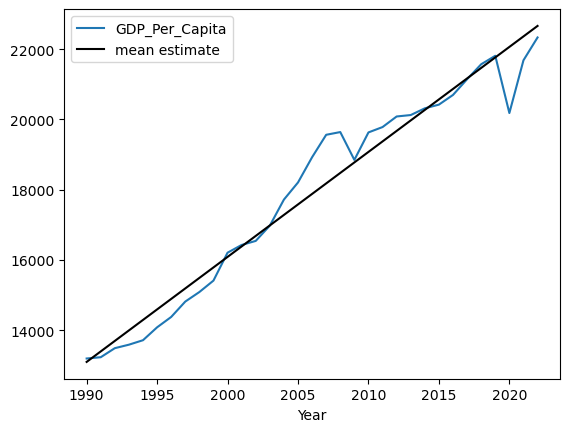

In [37]:
fig, ax = plt.subplots()
gdp_le_mean = gdp_le.groupby('Year')['GDP_Per_Capita'].mean()
gdp_le_mean.plot.line(legend='Mean GDP Per Capita')
pred_gdp_by_year_df.plot(kind='line', x='Year', y='mean estimate', color='black', legend = 'Estimated Mean', ax=ax);

Honestly, doesn't look bad!

In [40]:
#How do we 'Compare the actual mean life expectancy per year to the model's estimate. 
#How well does it do?' and 'Plot the actual values against your model's estimates for the mean life expectancy.'

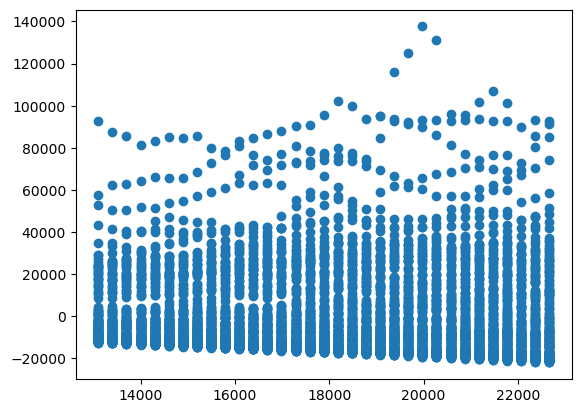

In [24]:
plt.scatter(lr_gdp_year.fittedvalues, lr_gdp_year.resid);

In [42]:
lr_gdp_year.rsquared

0.018915760823051464

Yikes! That's very low.

## Looking at Linear Regression for GDP Per Capita and Life Expectancy in 2021

In [45]:
gdp_le_2021 = gdp_le[gdp_le['Year']==2021]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


In [48]:
lr_lifeexp_gdppercap = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data=gdp_le_2021).fit()
lr_lifeexp_gdppercap.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

These coefficients tell me that average life expectancy in 2021 for a country with 0 GDP Per Capita would be approx 66, while life expectancy increases by about .000257 years per dollar increase in GDP Per Capita.

In [49]:
lr_lifeexp_gdppercap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        21:28:06   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""